<a href="https://colab.research.google.com/gist/sachinbhatiskb/b5b3beef1ccd0f5608ff73b90fe692fd/covid-19-analysis-pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Project/COVID-19 Analysis pro/covid_19_clean_complete.csv")

In [25]:
df.head(10)

,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455
2,2020-04-29,NaN,Algeria,3848,444,1702
3,2020-04-29,NaN,Andorra,743,42,423
4,2020-04-29,NaN,Angola,27,2,7
5,2020-04-29,NaN,Antigua and Barbuda,24,3,11
6,2020-04-29,NaN,Argentina,4285,214,1192
7,2020-04-29,NaN,Armenia,1932,30,900
8,2020-04-29,Australian Capital Territory,Australia,106,3,101
9,2020-04-29,New South Wales,Australia,3016,40,2284


In [26]:
df.count() #this are not null values

Date         23490
State         7020
Region       23490
Confirmed    23490
Deaths       23490
Recovered    23490
dtype: int64

In [27]:
df.isnull()

,Date,State,Region,Confirmed,Deaths,Recovered
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
23485,False,True,False,False,False,False
23486,False,True,False,False,False,False
23487,False,True,False,False,False,False
23488,False,True,False,False,False,False


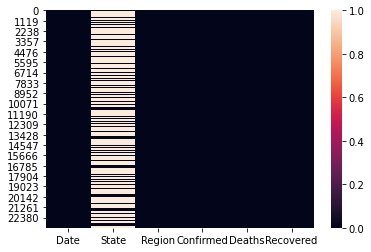

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.show() #white space shows null values

In [29]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455


In [30]:
df.groupby('Region').sum() #make particular group 

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1912038,48333,795799
Albania,180377,4950,111659
Algeria,1113284,69345,734712
Andorra,73999,4551,64292
Angola,22067,1016,6457
...,...,...,...
West Bank and Gaza,224197,1317,59356
Western Sahara,771,63,618
Yemen,67161,17707,23774


In [31]:
df.groupby('Region').sum().head(20) #top 20 columns

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1912038,48333,795799
Albania,180377,4950,111659
Algeria,1113284,69345,734712
Andorra,73999,4551,64292
Angola,22067,1016,6457
Antigua and Barbuda,3857,270,2497
Argentina,4375266,94541,1662007
Armenia,1550561,26612,846990
Australia,749411,9564,629396


In [32]:
df.groupby('Region')['Confirmed'].sum().head(20) #alphabetical confirmed case

Region
Afghanistan            1912038
Albania                 180377
Algeria                1113284
Andorra                  73999
Angola                   22067
Antigua and Barbuda       3857
Argentina              4375266
Armenia                1550561
Australia               749411
Austria                1563777
Azerbaijan             1101006
Bahamas                  10584
Bahrain                1704559
Bangladesh             8698670
Barbados                  8487
Belarus                4301946
Belgium                5294846
Belize                    2243
Benin                    63288
Bhutan                    4772
Name: Confirmed, dtype: int64

In [33]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False) #cases in desc order(max to min)

Region
US                       205817587
Brazil                    88606201
Russia                    44472587
India                     40493444
United Kingdom            23489018
                           ...    
Saint Kitts and Nevis         1392
Greenland                     1118
Holy See                      1072
Papua New Guinea              1050
Western Sahara                 771
Name: Confirmed, Length: 187, dtype: int64

In [34]:
df.groupby('Region')['Confirmed','Recovered'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Recovered
Region,,
Afghanistan,1912038,795799
Albania,180377,111659
Algeria,1113284,734712
Andorra,73999,64292
Angola,22067,6457
...,...,...
West Bank and Gaza,224197,59356
Western Sahara,771,618
Yemen,67161,23774


In [35]:
df[df.Confirmed<10] # cases less than 10

,Date,State,Region,Confirmed,Deaths,Recovered
25,2020-04-29,NaN,Bhutan,7,0,5
77,2020-04-29,Tibet,China,1,0,1
111,2020-04-29,Saint Barthelemy,France,6,0,6
154,2020-04-29,NaN,Mauritania,8,1,6
177,2020-04-29,NaN,Papua New Guinea,8,0,0
...,...,...,...,...,...,...
23340,2020-07-27,Saint Barthelemy,France,7,0,6
23470,2020-07-27,Northwest Territories,Canada,5,0,0
23474,2020-07-27,Anguilla,United Kingdom,3,0,3
23475,2020-07-27,British Virgin Islands,United Kingdom,8,1,7


In [36]:
df[~(df.Confirmed<10)] #cases less than 10 are removrd using negations

,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455
2,2020-04-29,NaN,Algeria,3848,444,1702
3,2020-04-29,NaN,Andorra,743,42,423
4,2020-04-29,NaN,Angola,27,2,7
...,...,...,...,...,...,...
23485,2020-07-27,NaN,Sao Tome and Principe,865,14,734
23486,2020-07-27,NaN,Yemen,1691,483,833
23487,2020-07-27,NaN,Comoros,354,7,328
23488,2020-07-27,NaN,Tajikistan,7235,60,6028


In [37]:
df #conivirmed removed only

,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455
2,2020-04-29,NaN,Algeria,3848,444,1702
3,2020-04-29,NaN,Andorra,743,42,423
4,2020-04-29,NaN,Angola,27,2,7
...,...,...,...,...,...,...
23485,2020-07-27,NaN,Sao Tome and Principe,865,14,734
23486,2020-07-27,NaN,Yemen,1691,483,833
23487,2020-07-27,NaN,Comoros,354,7,328
23488,2020-07-27,NaN,Tajikistan,7235,60,6028


In [38]:
df.groupby('Region').Confirmed.sum()

Region
Afghanistan           1912038
Albania                180377
Algeria               1113284
Andorra                 73999
Angola                  22067
                       ...   
West Bank and Gaza     224197
Western Sahara            771
Yemen                   67161
Zambia                 127676
Zimbabwe                50195
Name: Confirmed, Length: 187, dtype: int64

In [39]:
df.groupby('Region').Confirmed.sum().sort_values(ascending=False).head(10)

Region
US                205817587
Brazil             88606201
Russia             44472587
India              40493444
United Kingdom     23489018
Spain              21850923
Italy              21011935
Peru               18916177
France             17411804
Germany            16852017
Name: Confirmed, dtype: int64

In [40]:
df.groupby('Region').Deaths.sum().sort_values(ascending=False).head(20) #max death in desc order

Region
US                10076453
Brazil             3882006
United Kingdom     3581525
Italy              3002477
France             2588830
Spain              2479109
Mexico             1712342
India              1099421
Iran                860427
Belgium             842965
Germany             765266
Canada              664876
Peru                642909
Russia              611253
Netherlands         531155
Turkey              421743
China               417603
Sweden              413676
Ecuador             335392
Chile               319599
Name: Deaths, dtype: int64

In [41]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455


In [42]:
df[df.Region=='India'] # individual countrywise record

,Date,State,Region,Confirmed,Deaths,Recovered
129,2020-04-29,NaN,India,33062,1079,8437
390,2020-04-30,NaN,India,34863,1154,9068
651,2020-05-01,NaN,India,37257,1223,10007
912,2020-05-02,NaN,India,39699,1323,10819
1173,2020-05-03,NaN,India,42505,1391,11775
...,...,...,...,...,...,...
22314,2020-07-23,NaN,India,1288108,30601,817209
22575,2020-07-24,NaN,India,1337024,31358,849432
22836,2020-07-25,NaN,India,1385635,32060,885573
23097,2020-07-26,NaN,India,1435616,32771,917568


In [43]:
df.sort_values(by=['Confirmed'],ascending=True).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
2609,2020-05-08,NaN,Lesotho,0,0,0
260,2020-04-29,NaN,Lesotho,0,0,0
259,2020-04-29,NaN,Tajikistan,0,0,0
258,2020-04-29,NaN,Comoros,0,0,0
3392,2020-05-11,NaN,Lesotho,0,0,0
2348,2020-05-07,NaN,Lesotho,0,0,0
3131,2020-05-10,NaN,Lesotho,0,0,0
3653,2020-05-12,NaN,Lesotho,0,0,0
782,2020-05-01,NaN,Lesotho,0,0,0
1826,2020-05-05,NaN,Lesotho,0,0,0


In [44]:
#recovery in desc order
df.sort_values(by =['Recovered'], ascending=False).head(20)

,Date,State,Region,Confirmed,Deaths,Recovered
23257,2020-07-27,NaN,Brazil,2442375,87618,1846641
22996,2020-07-26,NaN,Brazil,2419091,87004,1812913
22735,2020-07-25,NaN,Brazil,2394513,86449,1785359
22474,2020-07-24,NaN,Brazil,2343366,85238,1693214
22213,2020-07-23,NaN,Brazil,2287475,84082,1620313
21952,2020-07-22,NaN,Brazil,2227514,82771,1591975
21691,2020-07-21,NaN,Brazil,2159654,81487,1555339
21430,2020-07-20,NaN,Brazil,2118646,80120,1514300
21169,2020-07-19,NaN,Brazil,2098389,79488,1459072
20908,2020-07-18,NaN,Brazil,2074860,78772,1447408
